<a href="https://colab.research.google.com/github/FrancescoMonaco/MultiDimMotifDiscovery/blob/main/Motif_Discovery.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#@title Basics
!pip install numpy scikit-learn datasketch scipy pyspark
!pip install stumpy
%matplotlib inline
import pandas as pd
import stumpy
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as dates
from matplotlib.patches import Rectangle
import datetime as dt
from numba import cuda
plt.style.use('https://raw.githubusercontent.com/TDAmeritrade/stumpy/main/docs/stumpy.mplstyle')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.3/88.3 kB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.0/317.0 MB 2.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.1-py2.py3-none-any.whl size=317488493 sha256=852776f9b37a582ac8de508092caa9f3be31dc4a28a6b6405831bf696931b8f6
  Stored in directory: /root/.cache/pip/wheels/80/1d/60/2c256ed38dddce2fdd93be545214a63e02fbd8d74fb0b7f3a6
Successfully built pyspark
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 169.1/169.1 kB 3.2 MB/s eta 0:00:00


# Stumpy

In [ ]:
if __name__ == "__main__":
    df = pd.read_csv("https://zenodo.org/record/4328047/files/toy.csv?download=1")
    #your_time_series = np.random.rand(10000)
    window_size = 30  # Approximately, how many data points might be found in a pattern
    all_gpu_devices = [device.id for device in cuda.list_devices()]  # Get a list of all available GPU devices

    matrix_profile, matrix_profile_idx = stumpy.mstump(df, m=window_size)

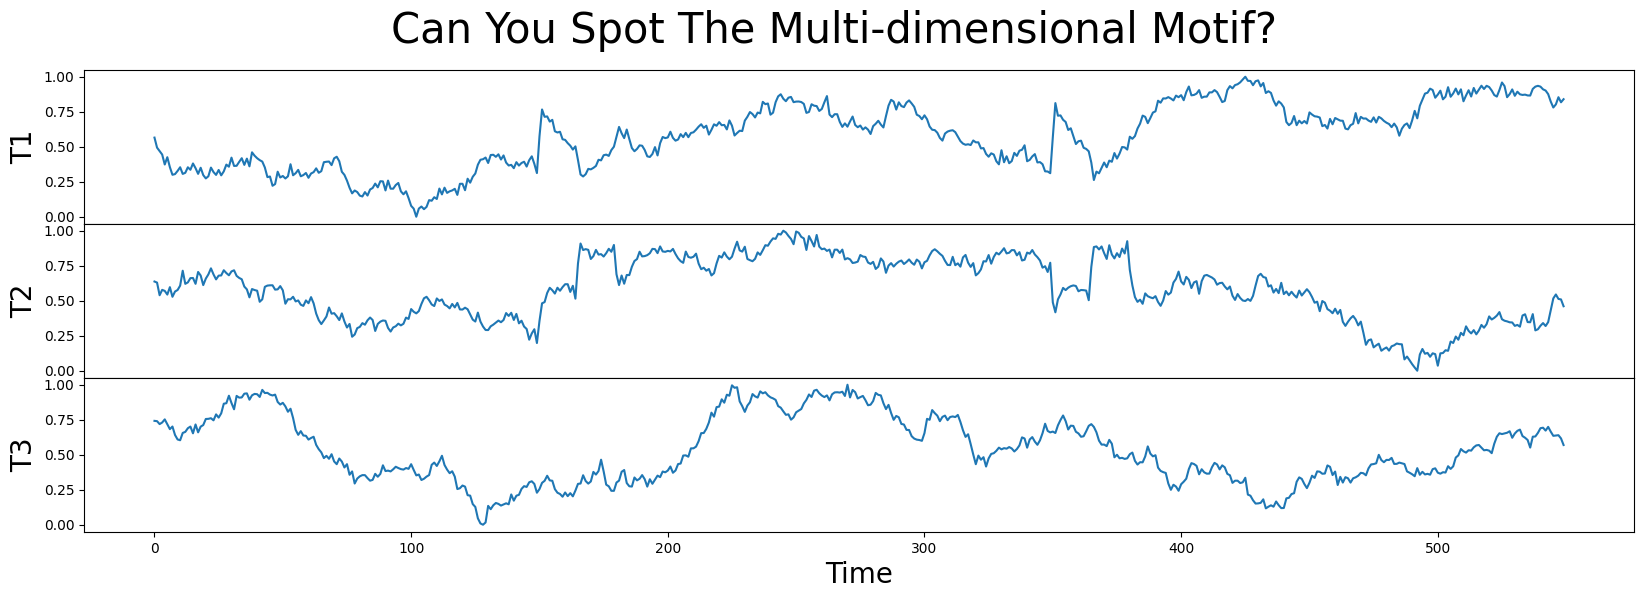

In [ ]:
fig, axs = plt.subplots(df.shape[1], sharex=True, gridspec_kw={'hspace': 0})
plt.suptitle('Can You Spot The Multi-dimensional Motif?', fontsize='30')

for i in range(df.shape[1]):
    axs[i].set_ylabel(f'T{i + 1}', fontsize='20')
    axs[i].set_xlabel('Time', fontsize ='20')
    axs[i].plot(df[f'T{i + 1}'])

plt.show()

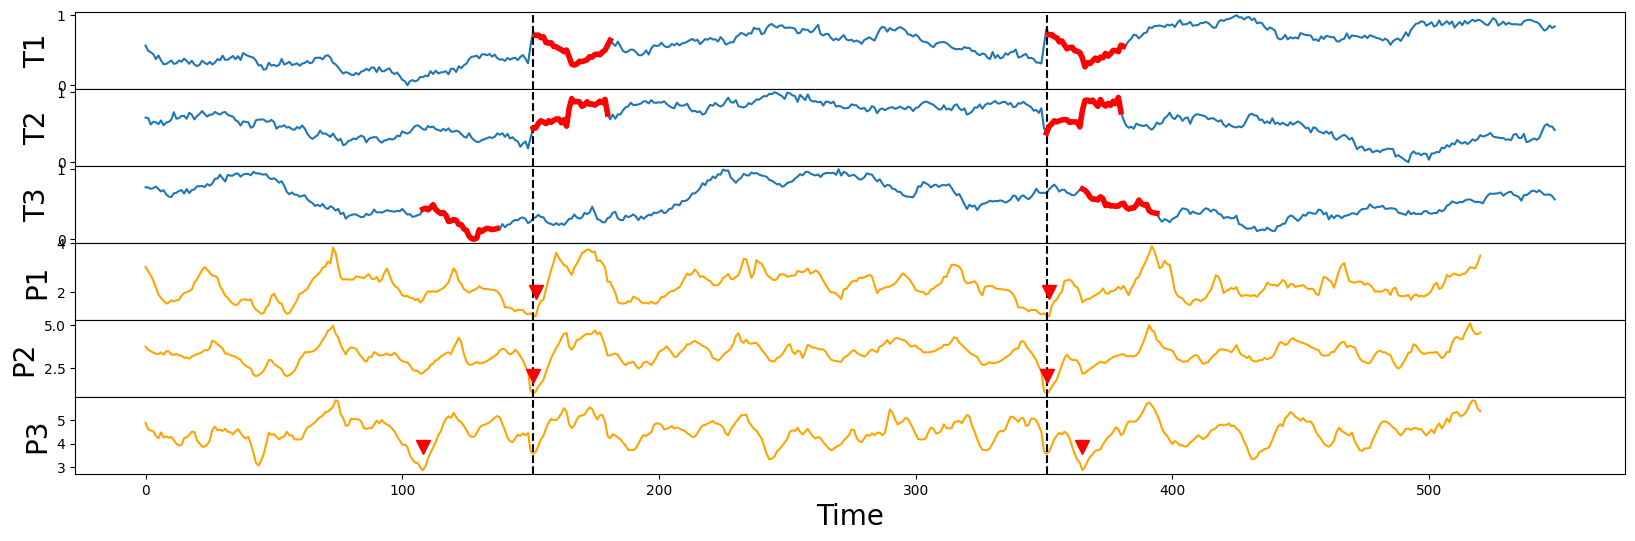

In [ ]:
motifs_idx = np.argmin(matrix_profile, axis=1)
nn_idx = matrix_profile_idx[np.arange(len(motifs_idx)), motifs_idx]
m = window_size
fig, axs = plt.subplots(matrix_profile.shape[0] * 2, sharex=True, gridspec_kw={'hspace': 0})

for k, dim_name in enumerate(df.columns):
    axs[k].set_ylabel(dim_name, fontsize='20')
    axs[k].plot(df[dim_name])
    axs[k].set_xlabel('Time', fontsize ='20')

    axs[k + matrix_profile.shape[0]].set_ylabel(dim_name.replace('T', 'P'), fontsize='20')
    axs[k + matrix_profile.shape[0]].plot(matrix_profile[k], c='orange')
    axs[k + matrix_profile.shape[0]].set_xlabel('Time', fontsize ='20')

    axs[k].axvline(x=motifs_idx[1], linestyle="dashed", c='black')
    axs[k].axvline(x=nn_idx[1], linestyle="dashed", c='black')
    axs[k + matrix_profile.shape[0]].axvline(x=motifs_idx[1], linestyle="dashed", c='black')
    axs[k + matrix_profile.shape[0]].axvline(x=nn_idx[1], linestyle="dashed", c='black')

    #if dim_name != 'T3':
    axs[k].plot(range(motifs_idx[k], motifs_idx[k] + m), df[dim_name].iloc[motifs_idx[k] : motifs_idx[k] + m], c='red', linewidth=4)
    axs[k].plot(range(nn_idx[k], nn_idx[k] + m), df[dim_name].iloc[nn_idx[k] : nn_idx[k] + m], c='red', linewidth=4)
    axs[k + matrix_profile.shape[0]].plot(motifs_idx[k], matrix_profile[k, motifs_idx[k]] + 1, marker="v", markersize=10, color='red')
    axs[k + matrix_profile.shape[0]].plot(nn_idx[k], matrix_profile[k, nn_idx[k]] + 1, marker="v", markersize=10, color='red')

plt.show()

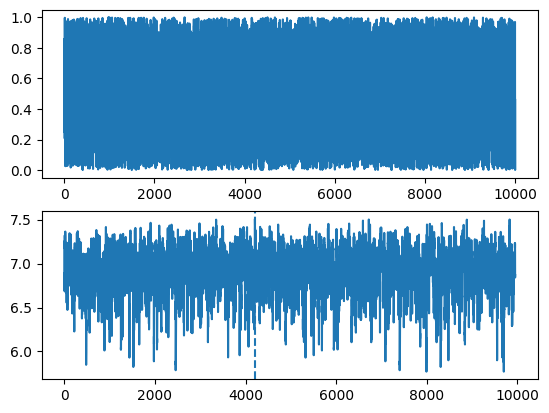

In [ ]:
fig, axs = plt.subplots(2)

discord_idx = np.argsort(matrix_profile[:, 0])[-1]
nearest_neighbor_distance = matrix_profile[discord_idx, 0]

axs[0].plot(your_time_series)
rect = Rectangle((discord_idx, 0), 640, 40, facecolor='lightgrey')
axs[1].plot(matrix_profile[:,0])
axs[1].axvline(x=discord_idx, linestyle="dashed")
plt.show()

#ATTIMO

In [ ]:
!pip install pyattimo

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 6.3 MB/s eta 0:00:00


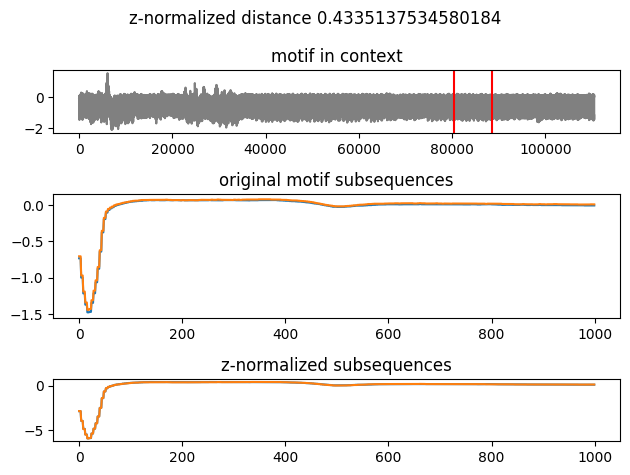

In [ ]:
import pyattimo

# Load an example time series
ts = pyattimo.load_dataset("ecg", prefix=1000000)

# Create the motifs iterator
motifs = pyattimo.MotifsIterator(ts, w=1000, max_k=100)

# Get the top motif via the iterator interface
m = next(motifs)

# Plot the motif just obtained
m.plot()

#AEON data

In [ ]:
import os
!pip install aeon ucimlrepo
import aeon
from aeon.datasets import load_from_tsfile
from aeon.datasets import load_classification

X, y = load_classification("MotionSenseHAR")
print(" Shape of X = ", X.shape)

 Shape of X =  (1231, 12, 1000)


In [ ]:
pick = np.abs(X[:,:,1])
print(pick.shape)
matrix_profile, matrix_profile_idx = stumpy.mstump(pick, m=8)

(1231, 12)


ValueError: Automatic legend placement (loc='best') not implemented for figure legend

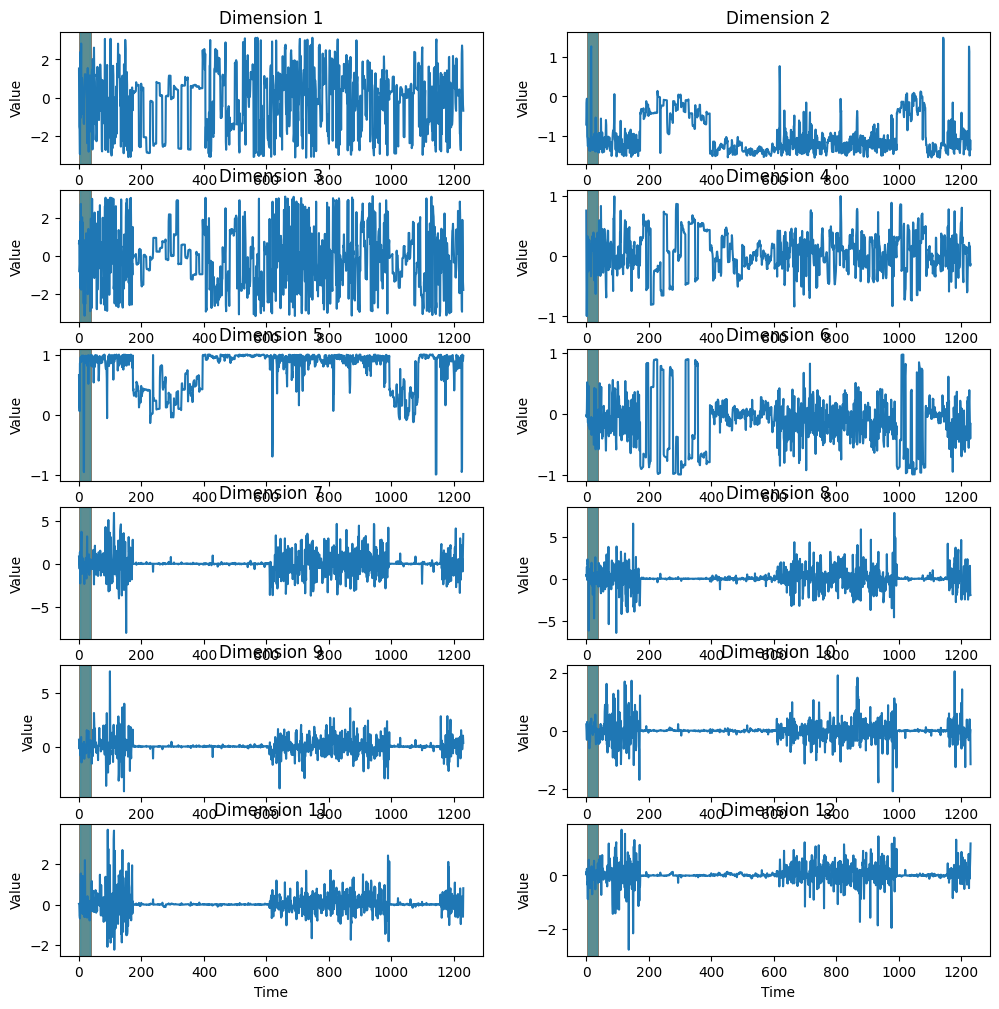

In [ ]:
top_3_motifs_per_dim = {}

import matplotlib.pyplot as plt

fig, axes = plt.subplots(6, 2, figsize=(12, 12))  # Adjust figsize as needed

for dim, ax in enumerate(axes.flat):
    ax.plot(X[:, dim,1])  # Plot original timeseries for each dimension
    title = f"Dimension {dim+1}"
    ax.set_title(title)
    ax.set_xlabel("Time")
    ax.set_ylabel("Value")

    # Highlight top 3 motifs in each dimension
    top_3_indices = matrix_profile_idx[:,1]
    for i, motif_index in enumerate(top_3_indices):
        start_index = motif_index
        end_index = start_index + window_size
        ax.axvspan(start_index, end_index, color=f'C{i}', alpha=0.3, label=f"Motif {i+1}")

fig.legend(loc='best')  # Adjust legend placement as needed
plt.tight_layout()
plt.show()


In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
air_quality = fetch_ucirepo(id=360)

# data (as pandas dataframes)
X = air_quality.data.features
print(air_quality.metadata)

{'uci_id': 360, 'name': 'Air Quality', 'repository_url': 'https://archive.ics.uci.edu/dataset/360/air+quality', 'data_url': 'https://archive.ics.uci.edu/static/public/360/data.csv', 'abstract': 'Contains the responses of a gas multisensor device deployed on the field in an Italian city. Hourly responses averages are recorded along with gas concentrations references from a certified analyzer. ', 'area': 'Computer Science', 'tasks': ['Regression'], 'characteristics': ['Multivariate', 'Time-Series'], 'num_instances': 9358, 'num_features': 15, 'feature_types': ['Real'], 'demographics': [], 'target_col': None, 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2008, 'last_updated': 'Fri Oct 27 2023', 'dataset_doi': '10.24432/C59K5F', 'creators': ['Saverio Vito'], 'intro_paper': None, 'additional_info': {'summary': 'The dataset contains 9358 instances of hourly averaged responses from an array of 5 metal oxide chemical sensors embedded i

In [ ]:
X = X.iloc[:,2:]
matrix_profile, matrix_profile_idx = stumpy.mstump(X, m=30)

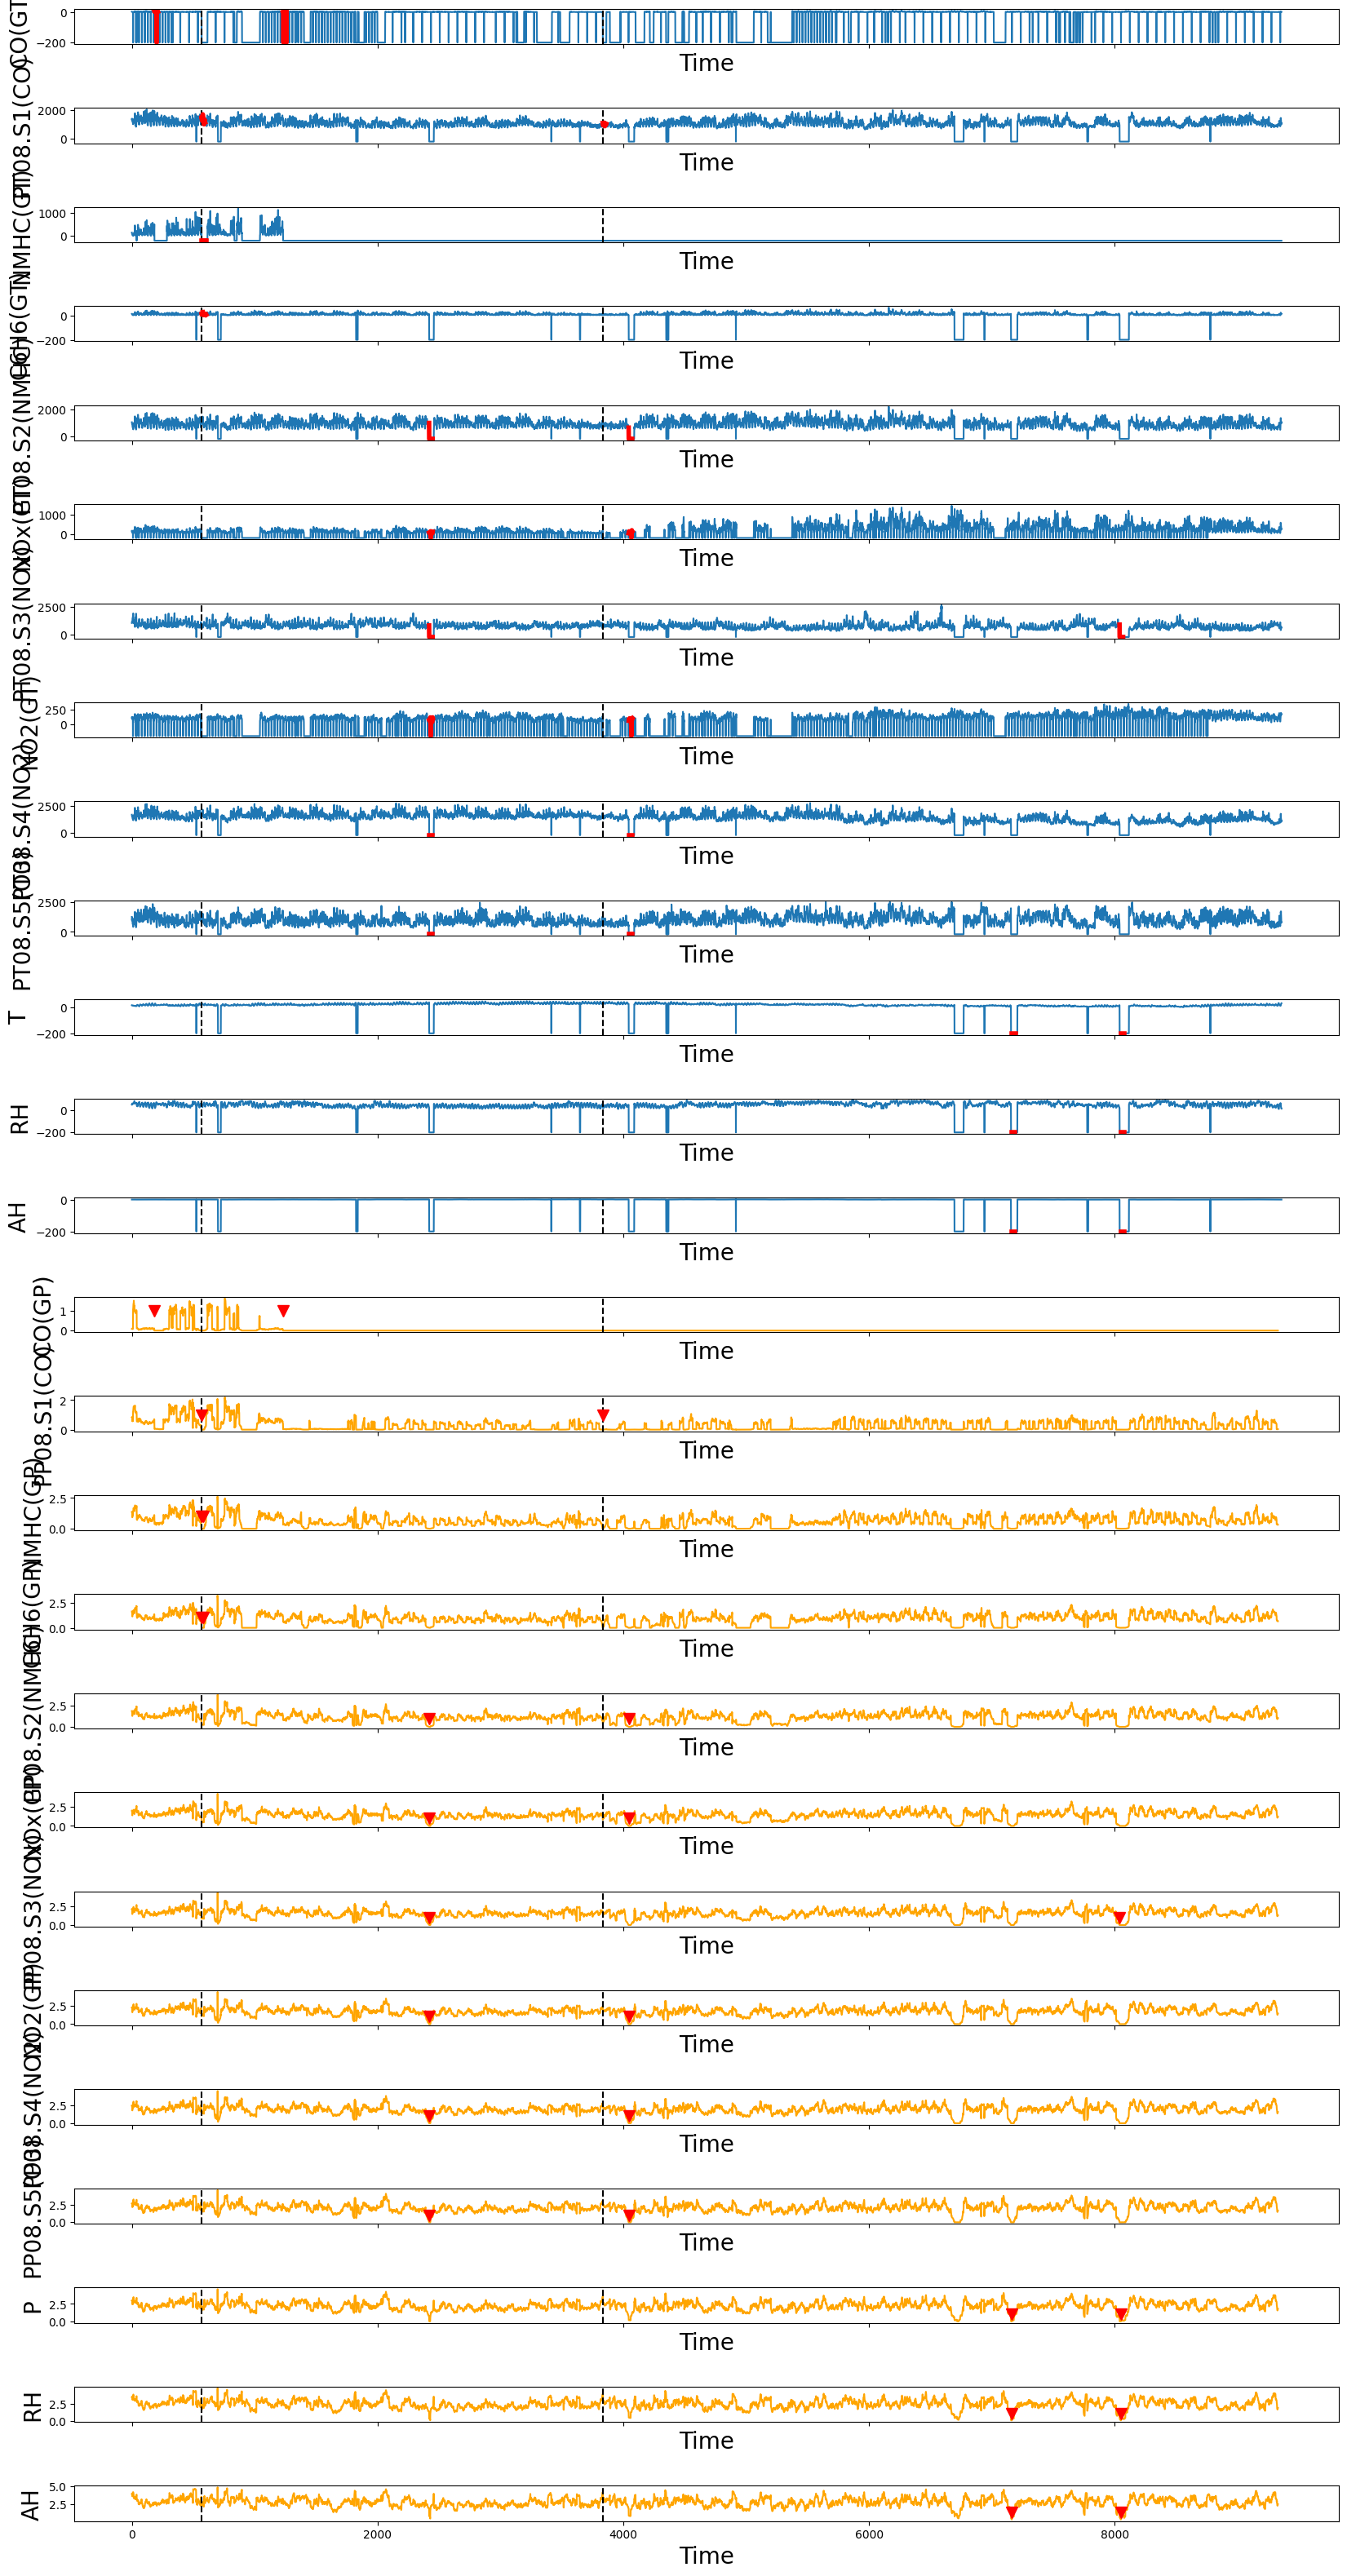

In [ ]:
motifs_idx = np.argmin(matrix_profile, axis=1)
nn_idx = matrix_profile_idx[np.arange(len(motifs_idx)), motifs_idx]
m = 30
fig, axs = plt.subplots(matrix_profile.shape[0] * 2, sharex=True, gridspec_kw={'hspace': 1.8}, figsize=(20,40))

for k, dim_name in enumerate(X.columns):
    axs[k].set_ylabel(dim_name, fontsize='20')
    axs[k].plot(X[dim_name])
    axs[k].set_xlabel('Time', fontsize ='20')

    axs[k + matrix_profile.shape[0]].set_ylabel(dim_name.replace('T', 'P'), fontsize='20')
    axs[k + matrix_profile.shape[0]].plot(matrix_profile[k], c='orange')
    axs[k + matrix_profile.shape[0]].set_xlabel('Time', fontsize ='20')

    axs[k].axvline(x=motifs_idx[1], linestyle="dashed", c='black')
    axs[k].axvline(x=nn_idx[1], linestyle="dashed", c='black')
    axs[k + matrix_profile.shape[0]].axvline(x=motifs_idx[1], linestyle="dashed", c='black')
    axs[k + matrix_profile.shape[0]].axvline(x=nn_idx[1], linestyle="dashed", c='black')

    #if dim_name != 'T3':
    axs[k].plot(range(motifs_idx[k], motifs_idx[k] + m), X[dim_name].iloc[motifs_idx[k] : motifs_idx[k] + m], c='red', linewidth=4)
    axs[k].plot(range(nn_idx[k], nn_idx[k] + m), X[dim_name].iloc[nn_idx[k] : nn_idx[k] + m], c='red', linewidth=4)
    axs[k + matrix_profile.shape[0]].plot(motifs_idx[k], matrix_profile[k, motifs_idx[k]] + 1, marker="v", markersize=10, color='red')
    axs[k + matrix_profile.shape[0]].plot(nn_idx[k], matrix_profile[k, nn_idx[k]] + 1, marker="v", markersize=10, color='red')

plt.show()

#Thesis Plots

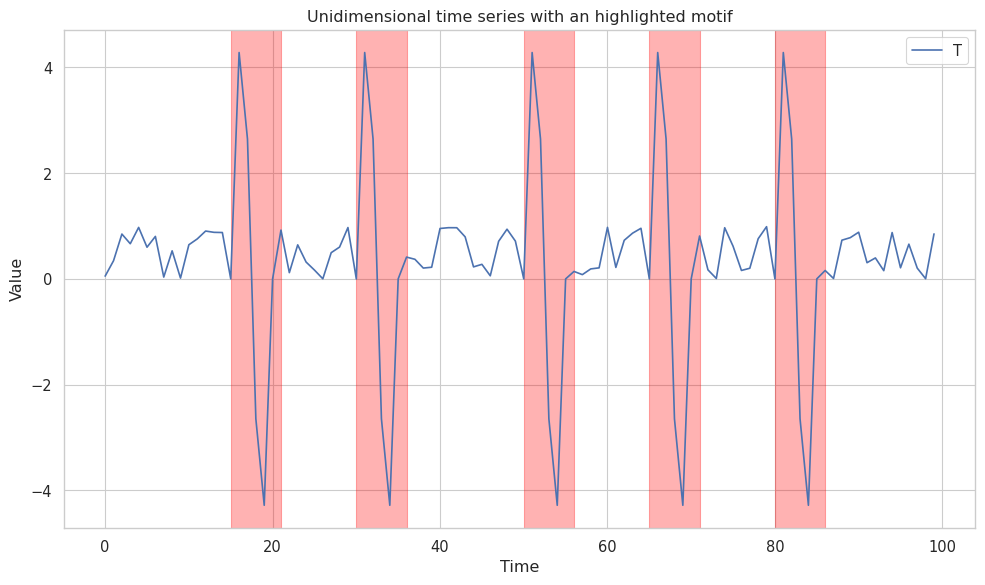

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from stumpy import stump

# Set seaborn style
sns.set(style="whitegrid", context="paper", font_scale=1.2)

# Create sample timeseries
timeseries = np.random.rand(100)
timeseries = timeseries.astype(float)

# Plant motifs at specific locations
motif_length = 6
motif = 4.5 * np.sin(np.linspace(0, 2 * np.pi, motif_length))

# Plant the motif at specific locations
motif_locations = [15, 30, 50, 65, 80]

for loc in motif_locations:
    timeseries[loc:loc+motif_length] = motif

m = 6
# Calculate matrix profile and find motif
mp = stump(timeseries, m=m)

# Plot the entire timeseries with planted motifs highlighted using seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(data=timeseries, label="T")
plt.title("Unidimensional time series with an highlighted motif")
plt.xlabel("Time")
plt.ylabel("Value")

# Highlight planted motifs using rectangles
for motif_idx in motif_locations:
    plt.axvspan(motif_idx, motif_idx + motif_length, color='red', alpha=0.3)

plt.legend()
plt.tight_layout()
plt.show()


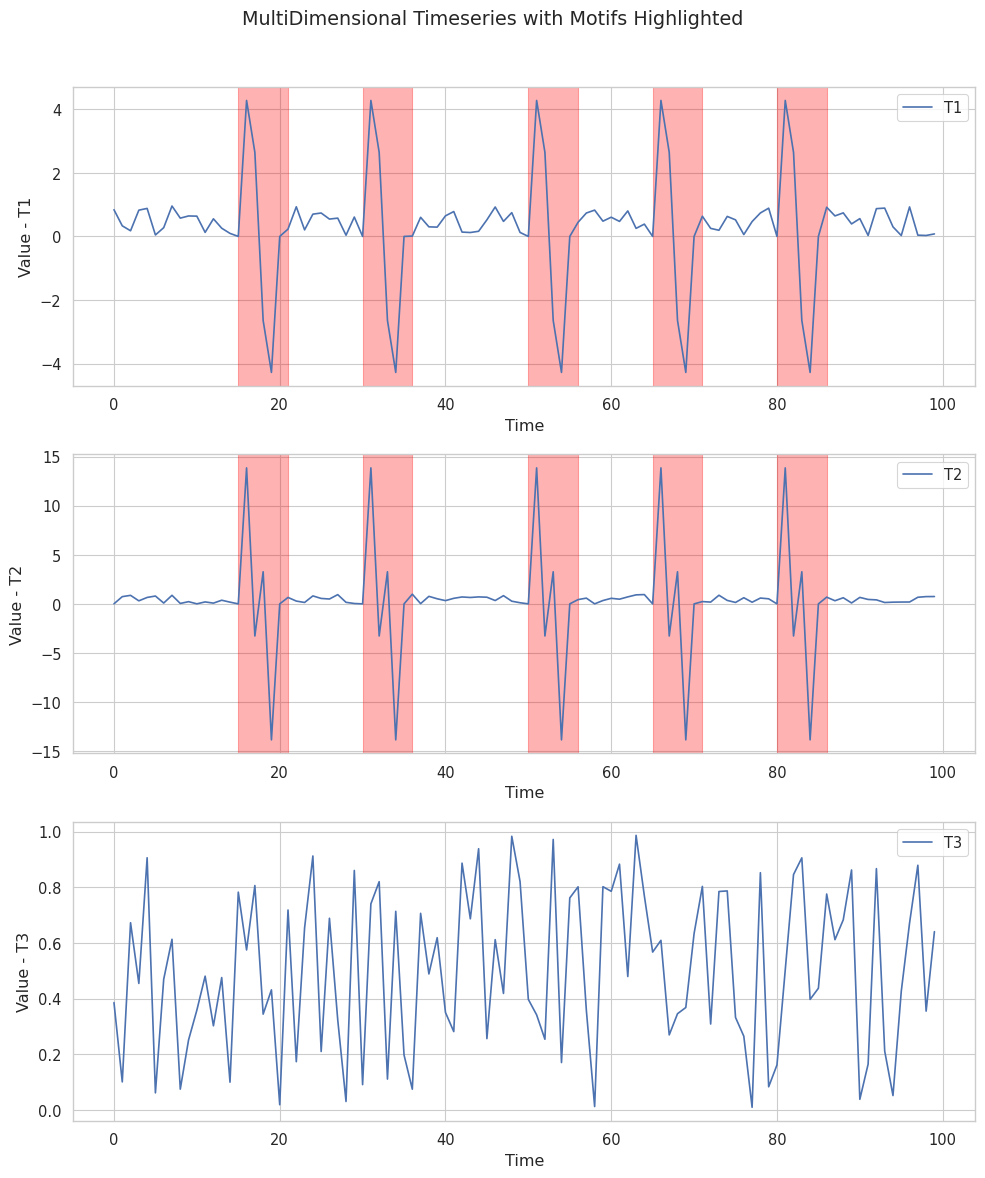

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from stumpy import mstump

# Set seaborn style
sns.set(style="whitegrid", context="paper", font_scale=1.2)

# Create sample 3-dimensional timeseries
timeseries_3d = np.random.rand(100, 3)
timeseries_3d[:, 0] = timeseries  # One dimension is the same as the unidimensional time series

# Plant motifs at specific locations in the second dimension
motif_length = 6
motif = 4.5 * np.tan(np.linspace(0, 2 * np.pi, motif_length))

# Plant the motif at specific locations in the second dimension
motif_locations = [15, 30, 50, 65, 80]

for loc in motif_locations:
    timeseries_3d[loc:loc+motif_length, 1] = motif

# The third dimension is just noise
timeseries_3d[:, 2] = np.random.rand(100)

m = 6
df = pd.DataFrame(timeseries_3d, columns=['T1', 'T2', 'T3'])
# Calculate matrix profile and find motifs for the first 2 dimensions
mp, indices = mstump(df, m=m)

# Plot 3 subplots, one for each dimension, and highlight motifs with rectangles
fig, axs = plt.subplots(3, 1, figsize=(10, 12))

for i, dimension in enumerate(['T1', 'T2', 'T3']):
    axs[i].plot(df[dimension], label=dimension)

    # Highlight motifs using rectangles
    for motif_idx in motif_locations:
        if(i==2): break
        axs[i].axvspan(motif_idx, motif_idx + motif_length, color='red', alpha=0.3)

    axs[i].set_xlabel("Time")
    axs[i].set_ylabel(f"Value - {dimension}")
    axs[i].legend()

plt.suptitle("MultiDimensional Timeseries with Motifs Highlighted")
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

In [ ]:
!pip install pyts
from pyts.approximation import PiecewiseAggregateApproximation
from pyts.approximation import SymbolicAggregateApproximation

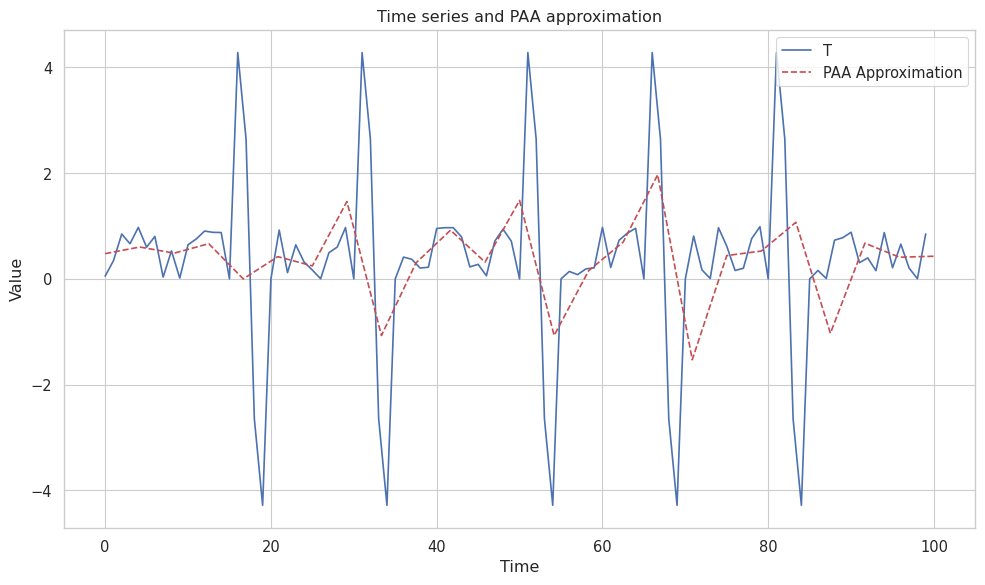

In [ ]:
paa = PiecewiseAggregateApproximation(window_size=4)
#timeseries = timeseries/np.linalg.norm(timeseries) + 1e-16
t_in = timeseries.reshape(1,-1)
X_paa = paa.transform(t_in)

n_points = len(timeseries)
window_size = 4
new_x = np.linspace(0, n_points, 25)

# Plot original time series
plt.figure(figsize=(10, 6))
sns.lineplot(data=timeseries, label="T")

# Plot PAA approximation dashed
plt.plot(new_x, X_paa.flatten(), 'r--', label="PAA Approximation")

plt.title("Time series and PAA approximation")
plt.xlabel("Time")
plt.ylabel("Value")

plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
sax = SymbolicAggregateApproximation(n_bins=7, strategy='normal')
X_sax = sax.fit_transform(X_paa)

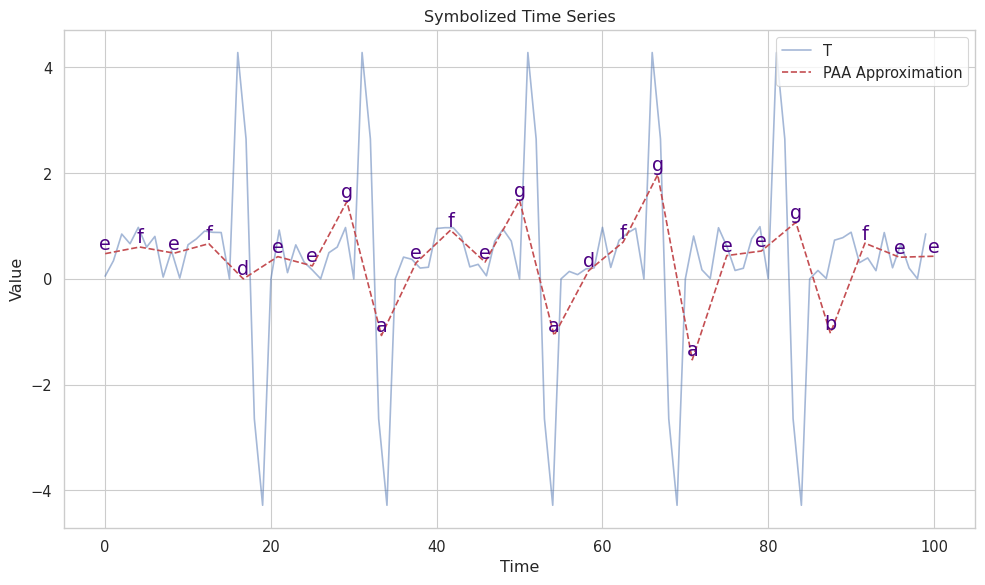

In [ ]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=timeseries, label="T", alpha=0.5 )

# Plot PAA approximation dashed
plt.plot(new_x, X_paa.flatten(), 'r--', label="PAA Approximation")
for i, (x, sax_value,y) in enumerate(zip(new_x, X_sax.flatten(), X_paa.flatten())):
    plt.text(x, y, sax_value, ha='center', va='bottom', color='indigo', fontsize='large')

plt.title("Symbolized Time Series")
plt.xlabel("Time")
plt.ylabel("Value")

plt.legend()
plt.tight_layout()
plt.show()

#Test

In [27]:
import numpy as np
from sklearn.random_projection import SparseRandomProjection
from datasketch import MinHashLSH, MinHash
from scipy.spatial.distance import euclidean
import pandas as pd
import matplotlib.pyplot as plt


def z_normalized_euclidean_distance(ts1, ts2, random_indices):
    # Ensure both time series have the same dimensions
    if ts1.shape != ts2.shape:
        raise ValueError("Time series must have the same dimensions.")
    # Pick the dimensions used in this iteration
    ts1 = ts1[:,random_indices]
    ts2 = ts2[:,random_indices]

    # Calculate mean and standard deviation for each dimension
    mean_ts1 = np.mean(ts1, axis=0)
    std_ts1 = np.std(ts1, axis=0)

    mean_ts2 = np.mean(ts2, axis=0)
    std_ts2 = np.std(ts2, axis=0)

    sum_sqrd = 0.0

    # z-normalized dist
    for item1, item2 in zip(ts1,ts2):
      sum_sqrd += np.square((((item1-mean_ts1)/std_ts1) - ((item2-mean_ts2)/std_ts2)))
    return np.sum(np.sqrt(sum_sqrd))

def random_projection_cycle(data, n_components):
    # Perform random projection on the data
    transformer = SparseRandomProjection(n_components=n_components)
    projected_data = transformer.fit_transform(data)

    return projected_data

def minhash_signature(data, minhasher):

    #z normalize before the hashing
    mean = np.mean(data, axis=0)
    std = np.std(data, axis=0)
    data_hash = (data - mean)/std

    # Update MinHash with data points
    minhasher.update_batch(np.ascontiguousarray(data_hash))
    return minhasher.copy()

def find_collisions(lsh, query_signature):
    # Query the LSH index for potential collisions
    result = lsh.query(query_signature)

    return result

def motif_find(time_series, window, projection_iter, k, project_comp, lsh_threshold):
  # Data
    dimension = time_series.shape[1]
    num_comp = project_comp
    top = []
  # Extract all subsequences
    subsequences = []

    for i in range(len(time_series) - window_size + 1):
        subsequence = time_series[i:i + window_size]
        subsequences.append(subsequence)

    for i in range(projection_iter):
      # Random project
        #pj_ts = random_projection_cycle(subsequences, num_comp)
        # Find num_comp random numbers between 0 and dimension of time series
        random_indices = np.random.choice(dimension, num_comp, replace=False)
        pj_ts = [subsequence[:,random_indices] for subsequence in subsequences]
      # Compute fingerprints
          # Create MinHash object
        minhash = MinHash(num_perm=14)
        minhash_signatures = []

        for projected_subsequence in pj_ts:
            minhash_sig = minhash_signature(projected_subsequence, minhash)
            minhash_signatures.append(minhash_sig)

        lsh = MinHashLSH(threshold=lsh_threshold, num_perm=14)
        for ik, signature in enumerate(minhash_signatures):
          lsh.insert(ik, signature)

      # Find collisions
        for j, minhash_sig in enumerate(minhash_signatures):
                collisions = lsh.query(minhash_sig)
               # print(collisions)
                if len(collisions) > 1:
                    # Remove trivial matches, same subsequence or overlapping subsequences
                    collisions = [(j, c) for c in collisions if c != j and abs(c - j) > window_size]
                    for collision in collisions:
                      # If doesn't exists as the same or the reverse match
                      if collision not in top and (collision[1], collision[0]) not in top:
                        top.append(collision)

                    # If top exceeds max length, keep only the top k based on distance
                    if len(top) > k:
                        top.sort(key=lambda x: z_normalized_euclidean_distance(subsequences[x[0]], subsequences[x[1]], random_indices), reverse=True)
                        top = top[:k]

    # Return top k collisions
    return top



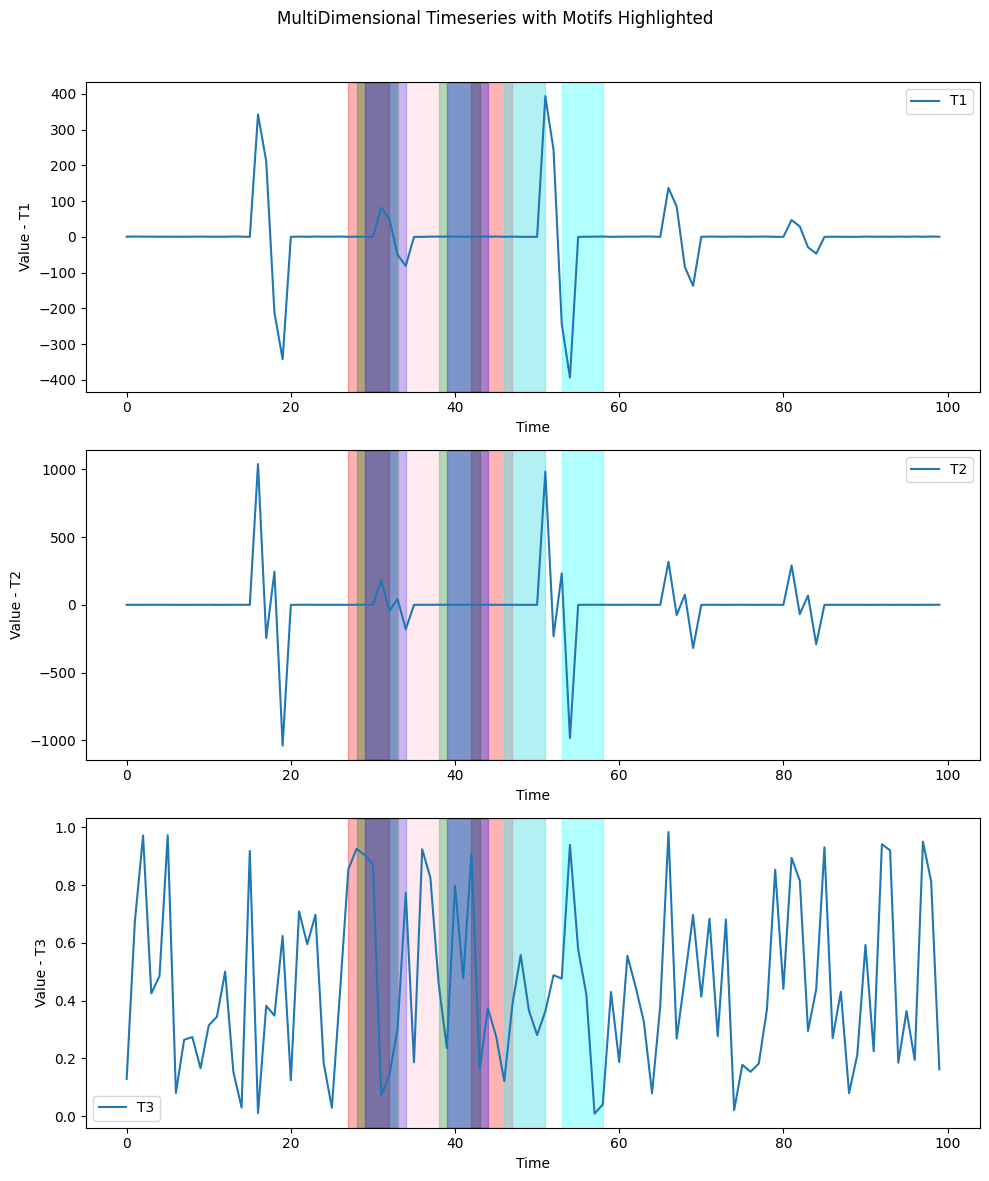

In [28]:
#@title Example 1

timeseries = np.random.rand(100)
timeseries = timeseries.astype(float)

# Plant motifs at specific locations
motif_length = 6
motif = 4.5 * np.sin(np.linspace(0, 2 * np.pi, motif_length))

# Plant the motif at specific locations
motif_locations = [15, 30, 50, 65, 80]

for loc in motif_locations:
    motif_place = motif * np.random.randint(1, 100)
    timeseries[loc:loc+motif_length] = motif_place
# Create sample 3-dimensional timeseries
timeseries_3d = np.random.rand(100, 3)
timeseries_3d[:, 0] = timeseries  # One dimension is the same as the unidimensional time series

# Plant motifs at specific locations in the second dimension
motif_length = 6
motif = 4.5 * np.tan(np.linspace(0, 2 * np.pi, motif_length))

# Plant the motif at specific locations in the second dimension
motif_locations = [15, 30, 50, 65, 80]

for loc in motif_locations:
    motif_place = motif * np.random.randint(1, 100)
    timeseries_3d[loc:loc+motif_length, 1] = motif_place

# The third dimension is just noise
timeseries_3d[:, 2] = np.random.rand(100)

# Set parameters
window_size = 5
lsh_threshold = 0.8
projection_iter = 20
k = 5

# Find motifs
motifs = motif_find(timeseries_3d, window_size, projection_iter, k, 2, lsh_threshold)

# Plot the original time series and highlight the motifs, find the motifs in all the time series
df = pd.DataFrame(timeseries_3d, columns=['T1', 'T2', 'T3'])

# Plot 3 subplots, one for each dimension
fig, axs = plt.subplots(3, 1, figsize=(10, 12))
colors = ["red", "green", "blue", "pink", "cyan"]
for i, dimension in enumerate(['T1', 'T2', 'T3']):
    axs[i].plot(df[dimension], label=dimension)
    axs[i].set_xlabel("Time")
    axs[i].set_ylabel(f"Value - {dimension}")
    axs[i].legend()

    for idx, motif in enumerate(motifs):
        # Highlight the motifs in all dimensions
        for m in motif:
            axs[i].axvspan(m, m + window_size, color=colors[idx], alpha=0.3)

plt.suptitle("MultiDimensional Timeseries with Motifs Highlighted")
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


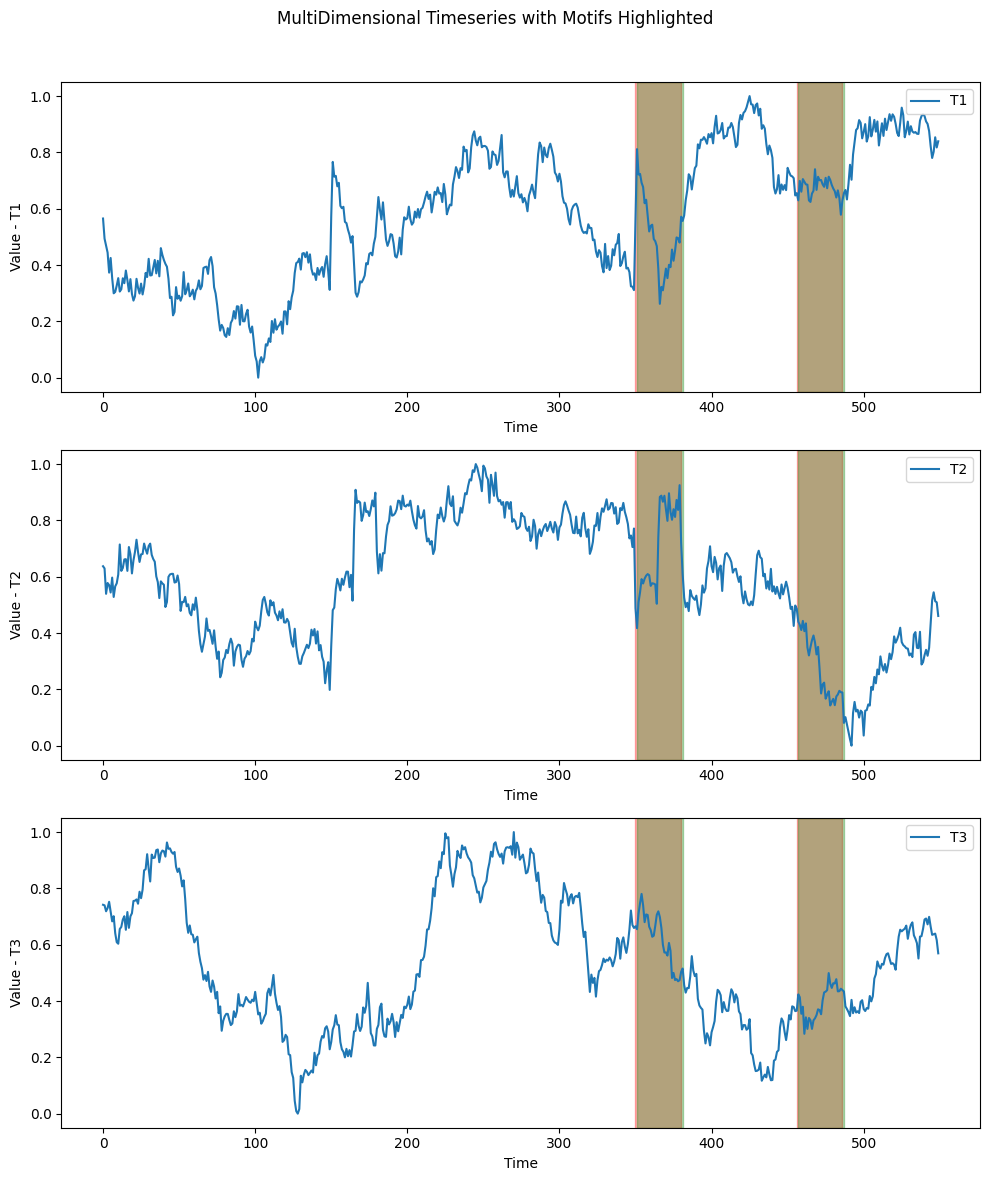

In [30]:
#@title Example 2
df = pd.read_csv("https://zenodo.org/record/4328047/files/toy.csv?download=1")
ts_test = df.to_numpy()

# Set parameters
window_size = 30
lsh_threshold = 0.8
projection_iter = 40
k = 2
proj= 2
colors = ["red", "green", "blue", "pink", "cyan"]

motifs = motif_find(ts_test, window_size, projection_iter, k, proj,lsh_threshold)

fig, axs = plt.subplots(3, 1, figsize=(10, 12))
for i, dimension in enumerate(df.columns):
    axs[i].plot(df[dimension], label=dimension)
    axs[i].set_xlabel("Time")
    axs[i].set_ylabel(f"Value - {dimension}")
    axs[i].legend()

    for idx, motif in enumerate(motifs):
        # Highlight the motifs of length 6
        for m in motif:
            axs[i].axvspan(m, m + 30, color=colors[idx], alpha=0.3)

plt.suptitle("MultiDimensional Timeseries with Motifs Highlighted")
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()